In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [37]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()


In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
x_train,x_test=x_train/255.,x_test/255.

In [8]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [14]:
k=len(set(y_train))

In [19]:
i=tf.keras.layers.Input(shape=x_train[0].shape)
x=tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=2,activation='relu')(i)
x=tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(512,'relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(k,'softmax')(x)
model=tf.keras.Model(i,x)


In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10,verbose=2)


Epoch 1/10
1875/1875 - 21s - loss: 0.5156 - accuracy: 0.8084 - val_loss: 0.3945 - val_accuracy: 0.8518 - 21s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 17s - loss: 0.3543 - accuracy: 0.8668 - val_loss: 0.3503 - val_accuracy: 0.8667 - 17s/epoch - 9ms/step
Epoch 3/10
1875/1875 - 16s - loss: 0.3077 - accuracy: 0.8845 - val_loss: 0.3280 - val_accuracy: 0.8778 - 16s/epoch - 9ms/step
Epoch 4/10
1875/1875 - 17s - loss: 0.2781 - accuracy: 0.8959 - val_loss: 0.3190 - val_accuracy: 0.8827 - 17s/epoch - 9ms/step
Epoch 5/10
1875/1875 - 17s - loss: 0.2515 - accuracy: 0.9048 - val_loss: 0.2993 - val_accuracy: 0.8887 - 17s/epoch - 9ms/step
Epoch 6/10
1875/1875 - 17s - loss: 0.2319 - accuracy: 0.9122 - val_loss: 0.3057 - val_accuracy: 0.8878 - 17s/epoch - 9ms/step
Epoch 7/10
1875/1875 - 16s - loss: 0.2112 - accuracy: 0.9192 - val_loss: 0.3189 - val_accuracy: 0.8927 - 16s/epoch - 9ms/step
Epoch 8/10
1875/1875 - 16s - loss: 0.1979 - accuracy: 0.9245 - val_loss: 0.3085 - val_accuracy: 0.8979 - 16s/epoch - 

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8981


[0.3172210156917572, 0.8981000185012817]

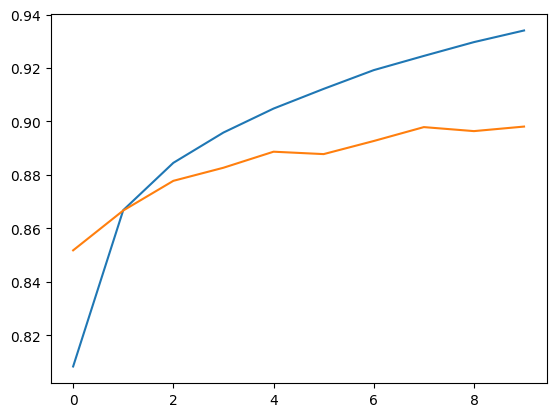

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    complite : https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


In [33]:
ypred=model.predict(x_test).argmax(axis=1)  
ypred

313/313 [==============================] - 2s 5ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

[[915   1  30  14   2   1  30   0   7   0]
 [  6 976   0  11   3   0   1   0   3   0]
 [ 19   0 905   8  33   0  33   0   2   0]
 [ 22   7  19 902  37   0  12   0   1   0]
 [  4   0  82  18 805   0  87   0   4   0]
 [  0   0   0   0   0 972   1  17   1   9]
 [180   1  95  28  73   0 606   0  17   0]
 [  0   0   0   0   0  11   0 955   1  33]
 [  3   1   3   2   4   2   1   0 983   1]
 [  1   0   0   0   0   5   0  32   0 962]]


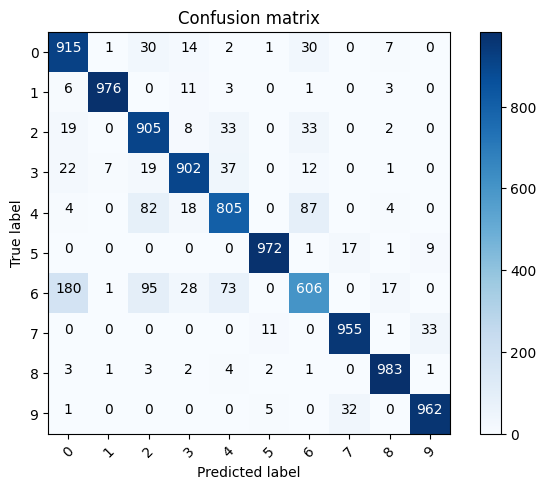

In [34]:
cm=confusion_matrix(y_test ,ypred)
plot_confusion_matrix(cm,[i for i in range(0,10)],normalize=False)